In [ ]:
'''
Name   : Rupesh Garsondiya
github : @Rupeshgarsondiya
Topic  : Transfer-Learning in Deep Learning
'''

'\nName   : Rupesh Garsondiya\ngithub : @Rupeshgarsondiya\nTopic  : Transfer-Learning in Deep Learning\n'

# Transfer Learning in Deep-Learning
Let's first discuss what is the problem with train our own architecture

1 > First we reuired a lot of data to train model

2 > It' take lots of time and also costly

- Pretrained model already train on large dataset  so we can use in our problem  it give batter result

- Now let's understand defination

**Defination :** Trasfer Learning is a reaserch problem in machine learning that
focuses on storing knowledge gained while solving our problem and applying it to a diffrent but realeted problem

**Refrance :** Wikipidia

Let's understand with graph

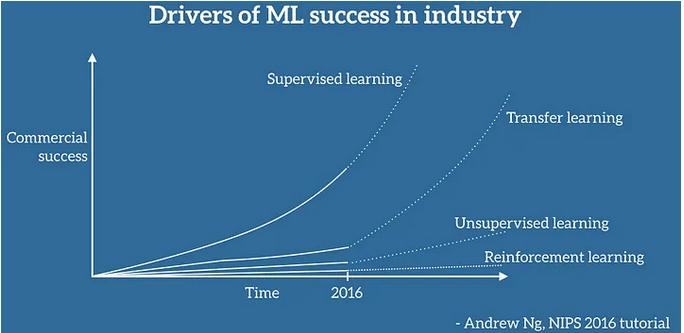


- Now we clearly understand after supervised learning trrsfer learning that thing to success in machine learning in industry

- Let's understand with the VGG16 architecture

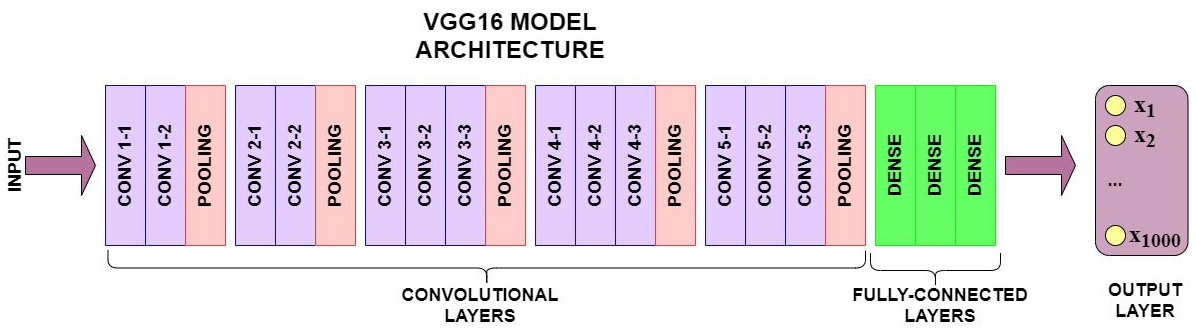


- In the image, we can see that the architecture has two parts: the first is the convolutional part, and the second is the dense layer.

- We can use the convolutional layers of the VGG16 model and replace the dense layers with our own. During training, we freeze the convolutional layers, meaning they remain unchanged while we train only the dense layers. This approach avoids retraining the convolutional layers.

**Why Transfer Learning Works :**
In a CNN, the initial convolutional layers are responsible for detecting primitive features (e.g., edges, corners, and textures). These features are common across most problems, which is why transfer learning is effective. Additionally, pre-trained models are trained on large datasets, making them capable of extracting robust features that can be reused for new tasks.

There is two type of trasfer learnign
1> Feature extraction
2> Fine Tuning

**Feature Extraction :**
In this technique, we use only the convolutional layers from a pre-trained model as feature extractors. The dense (fully connected) layers are custom-designed for our specific task, and only these layers are trained while the weights of the convolutional layers are kept frozen.

- We use the feature extraction technique when we want to leverage pre-trained convolutional layers for tasks with limited data, computational resources, or when the task is similar to the pre-trained model's domain.

- in this notebook we also use Feature extrxction technique

2> **Fine Tuning :** Fine-tuning is a transfer learning technique where a pre-trained model is adapted to a new task by training some or all of its layers on the new dataset, typically with a smaller learning rate to retain the learned features while adjusting them to the new task.

In [ ]:
# Loading the dataset from kaggle

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mahmudulhaqueshawon/catcat


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mahmudulhaqueshawon/catcat
License(s): apache-2.0
 99% 62.0M/62.9M [00:04<00:00, 18.8MB/s]
100% 62.9M/62.9M [00:04<00:00, 14.8MB/s]


In [ ]:
# import required library

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/catcat.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# create object of the pre train model

'''
Para
1> wights : imagenet imagenet is the large image dataset it's contains 1.4 Milion images over a 1000 classes
            The weight values here are from ImageNet, meaning these weights were actually learned during training
            on the ImageNet dataset

2> include_top : True or False False mean we not include the top layer (Dense layer) we only use the convolutional layer

3> input_shape : input shape of the iamge

4>

'''
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Get summary of the model
base_model.summary()

'''
Here we clearly see that in our base model skip the dense layer part we only use the convolutional layer
'''

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

'\nHere we clearly see that in our base model skip the dense layer part we only use the convolutional layer\n'

In [ ]:
# create the dense layer part

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


base_model.trainable = False # freeze the our convolutional it's mean it not train again

model.summary()


# use

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,934,401 (68.41 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)
)






Found 555 files belonging to 2 classes.
Found 138 files belonging to 2 classes.


In [ ]:

# normalize the pixel value of image
def normalize(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)





In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 657ms/step - accuracy: 0.8483 - loss: 0.3187 - val_accuracy: 0.8116 - val_loss: 0.3960
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.9570 - loss: 0.1283 - val_accuracy: 0.7971 - val_loss: 0.3961
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.9939 - loss: 0.0611 - val_accuracy: 0.8116 - val_loss: 0.4270
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.9923 - loss: 0.0501 - val_accuracy: 0.7899 - val_loss: 0.4294
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.9980 - loss: 0.0331 - val_accuracy: 0.7464 - val_loss: 0.5678
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.9939 - loss: 0.0378 - val_accuracy: 0.7754 - val_loss: 0.4647
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 0.7826 - val_loss: 0.5175
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 333ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0

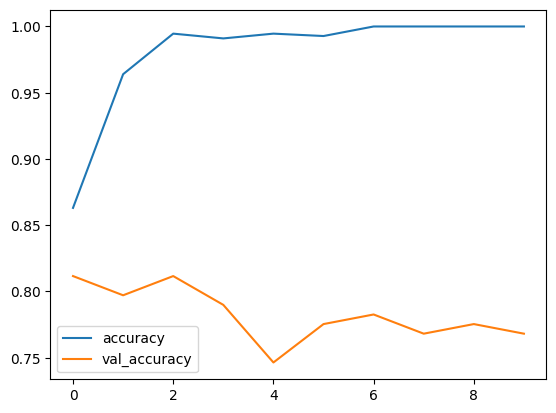

In [ ]:
# plot the accuracy graph
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# This is the case of overfiting training accuracy is around 99% and validation accuracy is just 80%-75%

In [ ]:
# create the dense layer part

model1 = Sequential()
model1.add(base_model)
model1.add(Flatten())
model.add(Dense(12,activation='relu'))
model1.add(Dense(6,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))


base_model.trainable = False # freeze the our convolutional it's mean it not train again

model1.summary()


model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(train_dataset, epochs=100, validation_data=test_dataset)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │         150,534 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,865,229 (56.71 MB)

 Trainable params: 150,541 (588.05 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step - accuracy: 0.4970 - loss: 0.8702 - val_accuracy: 0.7246 - val_loss: 0.6235
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.8082 - loss: 0.5583 - val_accuracy: 0.7174 - val_loss: 0.5609
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.8219 - loss: 0.4925 - val_accuracy: 0.6667 - val_loss: 0.5479
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.8185 - loss: 0.4313 - val_accuracy: 0.7754 - val_loss: 0.5276
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.9259 - loss: 0.4036 - val_accuracy: 0.7536 - val_loss: 0.5440
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.9483 - loss: 0.3796 - val_accuracy: 0.7536 - val_loss: 0.5986
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.9486 - loss: 0.3589 - val_accuracy: 0.7464 - val_loss: 0.5706
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.9807 - loss: 0.3578 - val_accu

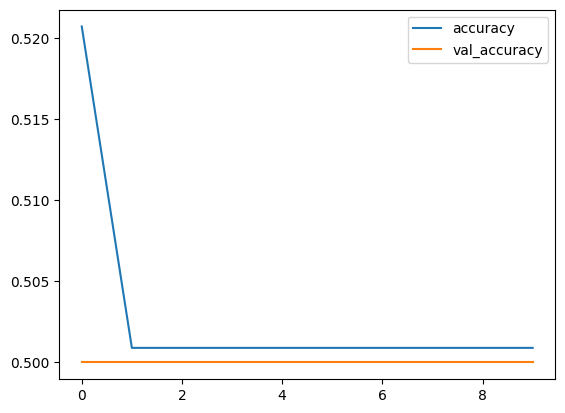

In [ ]:
# plot the accuracy graph
plt.plot(history1.history['accuracy'],label='accuracy')
plt.plot(history1.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()